In [1]:
# eseguo l'import delle liberie necessarie prima di effettuare l'EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Carico il file indicandone il percorso
file_path = r'C:\Users\user\Downloads\owid-covid-data.xlsx'

In [9]:
# Carico il dataset
df = pd.read_excel(file_path)

In [11]:
# Apporto una prima analisi del dataset

print(df.shape)  # Numero di righe e colonne
print(df.columns)  # Nome delle colonne
df.head()  # Prime righe del dataset

(429435, 67)
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothe

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [13]:
# Analisi delle colonne "continent" e "location"

print(df['continent'].unique())  # Valori unici in 'continent'
print(df['location'].unique()[:20])  # Prime 20 location uniche

['Asia' nan 'Europe' 'Africa' 'Oceania' 'North America' 'South America']
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados']


In [15]:
# Applico un filtro dei dati per distinguere quelli aggregati da quelli dettagliati

df_no_agg = df[df['continent'].notna()]  # Dati per singoli paesi
df_agg = df[df['continent'].isna()]  # Dati aggregati

In [17]:
# Controllo e quindi stampo a video quanti dati aggregati e non aggregati sono presenti

print(f"Numero di dati aggregati: {df_agg.shape[0]}")
print(f"Numero di dati per singoli paesi: {df_no_agg.shape[0]}")

Numero di dati aggregati: 26525
Numero di dati per singoli paesi: 402910


In [19]:
# Eseguo un'analisi delle colonne "new_cases" e "total_cases" che dispongono di logiche differenti

# new_cases = nuovi casi giornalieri

# total_cases = totale cumulativo fino a quel giorno

df[['new_cases', 'total_cases']].describe()

,new_cases,total_cases
count,4.101590e+05,4.118040e+05
mean,8.017360e+03,7.365292e+06
std,2.296649e+05,4.477582e+07
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,6.280750e+03
50%,0.000000e+00,6.365300e+04
75%,0.000000e+00,7.582720e+05
max,4.423623e+07,7.758668e+08


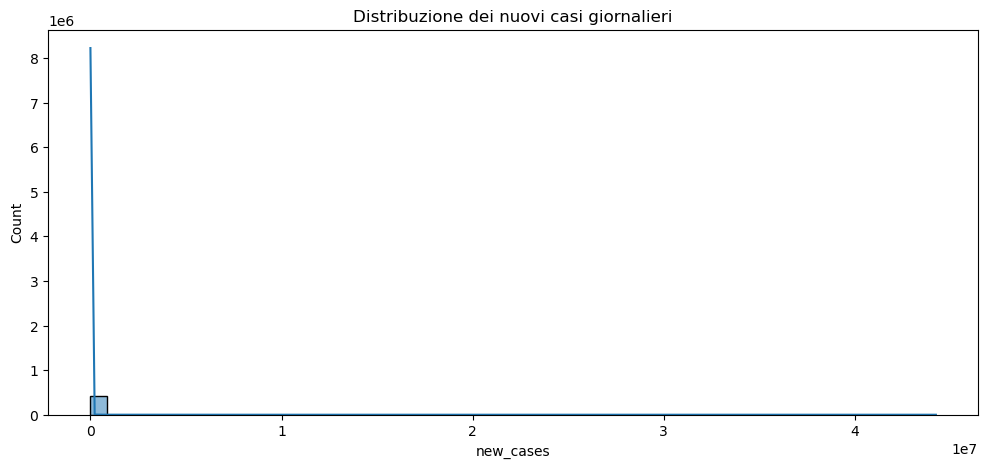

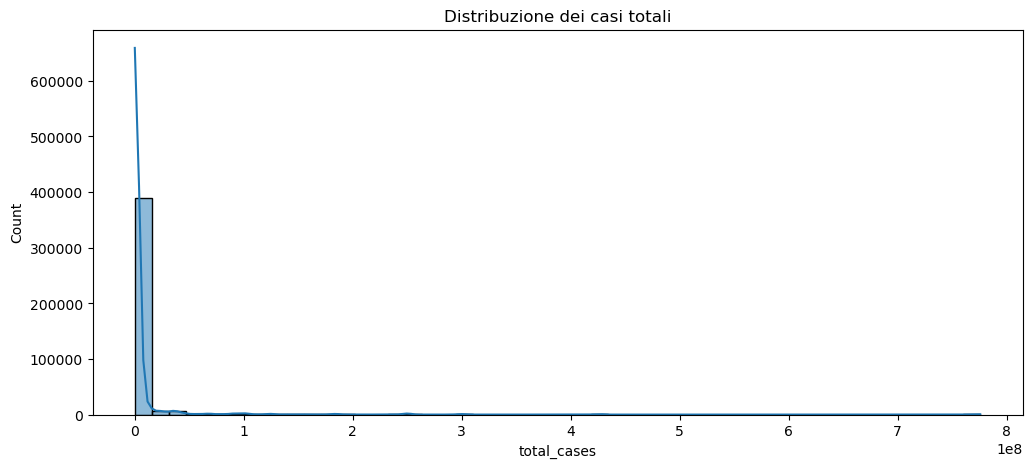

In [21]:
# Si vogliono gestire i possibili problemi:

# Dati mancanti (valori NaN).

# La presenza di valori negativi che non dovrebbero essere presenti

# Distribuzione dei valori (potrebbe essere utile visualizzarla con un grafico)

plt.figure(figsize=(12, 5))
sns.histplot(df['new_cases'].dropna(), bins=50, kde=True)
plt.title("Distribuzione dei nuovi casi giornalieri")
plt.show()


plt.figure(figsize=(12, 5))
sns.histplot(df['total_cases'].dropna(), bins=50, kde=True)
plt.title("Distribuzione dei casi totali")
plt.show()

In [23]:
# Controllo dei valori mancanti

missing_values = df.isnull().sum()
missing_values[missing_values > 0]  # Mostra solo le colonne con valori NaN

continent                                   26525
total_cases                                 17631
new_cases                                   19276
new_cases_smoothed                          20506
total_deaths                                17631
                                            ...  
human_development_index                    110308
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 63, dtype: int64

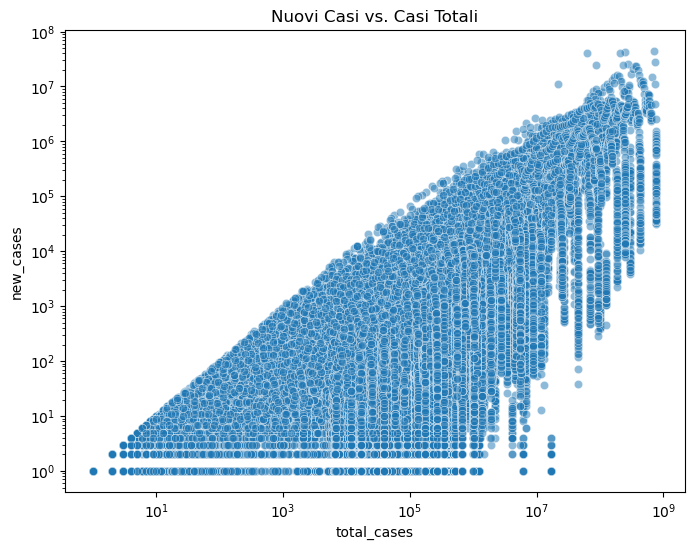

In [25]:
# Verifica della possibile correlazione tra la colonna "new_cases" e la colonna "total_cases"

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="total_cases", y="new_cases", alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.title("Nuovi Casi vs. Casi Totali")
plt.show()

In [27]:
# Verifica delle dimensioni del dataset e i relativi metadati

# Numero di righe e colonne
num_righe, num_colonne = df.shape
print(f"Il dataset contiene {num_righe} righe e {num_colonne} colonne.")

# Ottengo alcune informazioni sulle colonne
df.info()

# Individuo i tipi di dati di ogni colonna
print(df.dtypes)


# Visualizzo le statistiche descrittive (min, max, media, quartili, ecc.) sulle colonne numeriche e non numeriche, quindi anche sulle colonne categoriche (continent, location, ecc.)

# Statistiche sulle colonne numeriche

df.describe()

# Statistiche anche per colonne non numeriche

df.describe(include='all')

# Effettuo un controllo sui valori mancanti per ogni colonna del file

missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Mostra solo le colonne con NaN

Il dataset contiene 429435 righe e 67 colonne.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed    

In [29]:
# Analisi richiesta al punto 2 della consegna

# Filtro solo le righe che contengono dati aggregati per continente
df_continenti = df[df['location'].isin(df['continent'].dropna().unique())]

# Individuo il numero totale di casi per ogni continente
casi_per_continente = df_continenti.groupby('location')['total_cases'].max()

# Reperisco il totale mondiale dei casi
totale_mondiale = df[df['location'] == 'World']['total_cases'].max()

# Effettuo il calcolo della percentuale rispetto al totale mondiale
percentuale_continente = (casi_per_continente / totale_mondiale) * 100

# Stampo i risultati
risultati = pd.DataFrame({
    'Casi Totali': casi_per_continente,
    'Percentuale sul Totale Mondiale': percentuale_continente
})
print(risultati)

               Casi Totali  Percentuale sul Totale Mondiale
location                                                   
Africa          13145380.0                         1.694283
Asia           301499099.0                        38.859648
Europe         252916868.0                        32.597976
North America  124492666.0                        16.045624
Oceania         15003352.0                         1.933754
South America   68809418.0                         8.868716


In [47]:
import matplotlib.pyplot as plt

# Filtraggio dei dati relativi all'Italia nel 2022
df_italia_2022 = df[(df['location'] == 'Italy') & (df['date'].between('2022-01-01', '2022-12-31'))]

# Rimozione dei giorni senza misurazioni
df_italia_2022 = df_italia_2022.dropna(subset=['new_cases'])

# Converto la colonna "date" in formato "datetime"
df_italia_2022['date'] = pd.to_datetime(df_italia_2022['date'], errors='coerce')

# Controllo che la conversione sia avvenuta correttamente
print(df_italia_2022[['date']].head())  # Analisi delle prime righe

             date
186002 2022-01-01
186003 2022-01-02
186004 2022-01-03
186005 2022-01-04
186006 2022-01-05


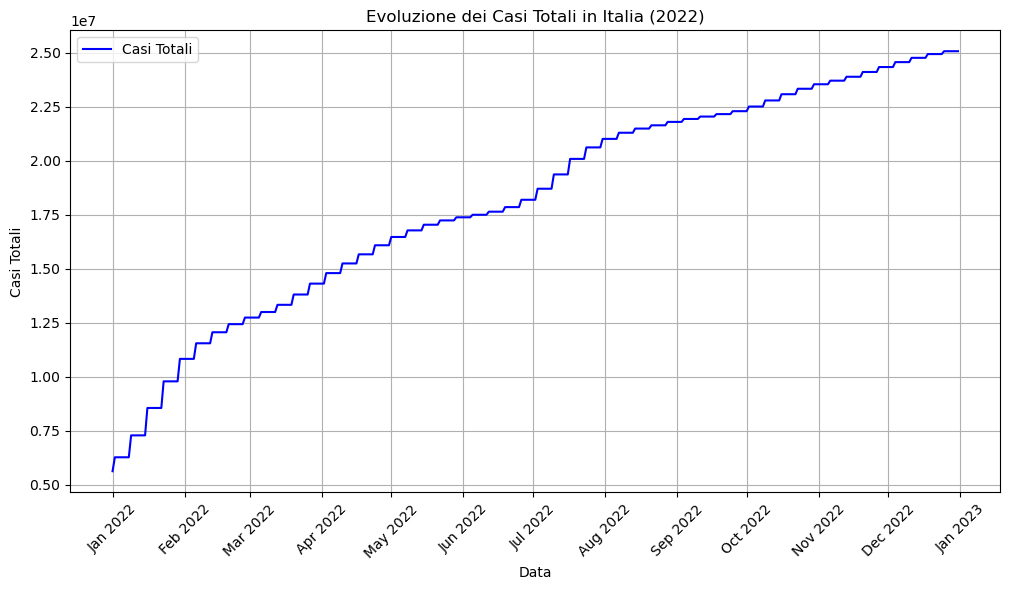

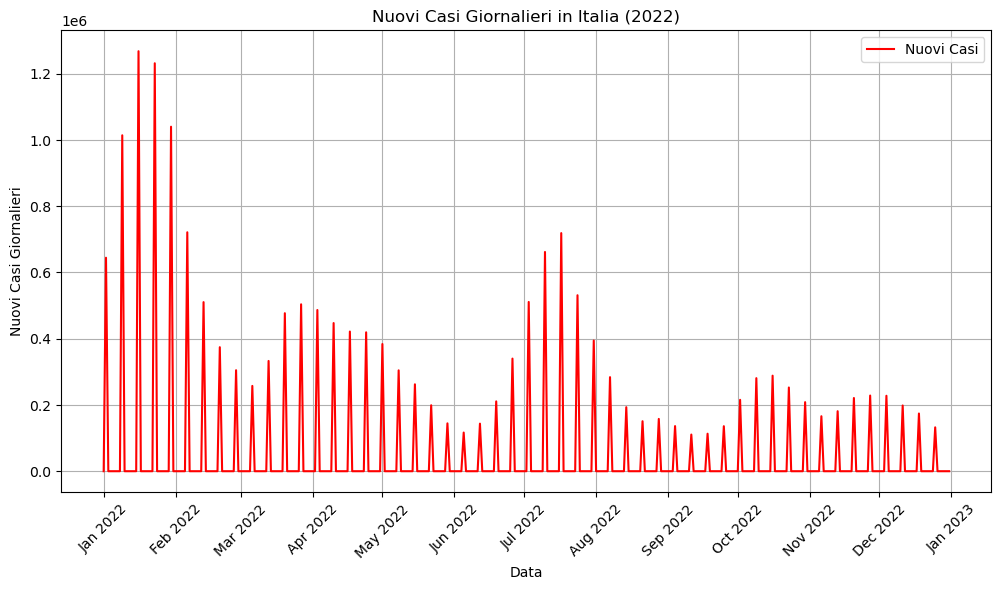

In [49]:
import matplotlib.dates as mdates

# Grafico dei casi totali
plt.figure(figsize=(12, 6))
plt.plot(df_italia_2022['date'], df_italia_2022['total_cases'], label='Casi Totali', color='blue')
plt.xlabel("Data")
plt.ylabel("Casi Totali")
plt.title("Evoluzione dei Casi Totali in Italia (2022)")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostra solo le date di inizio mese
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Formatta in "Mese Anno"
plt.legend()
plt.grid()
plt.show()

# Grafico dei nuovi casi
plt.figure(figsize=(12, 6))
plt.plot(df_italia_2022['date'], df_italia_2022['new_cases'], label='Nuovi Casi', color='red')
plt.xlabel("Data")
plt.ylabel("Nuovi Casi Giornalieri")
plt.title("Nuovi Casi Giornalieri in Italia (2022)")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.legend()
plt.grid()
plt.show()

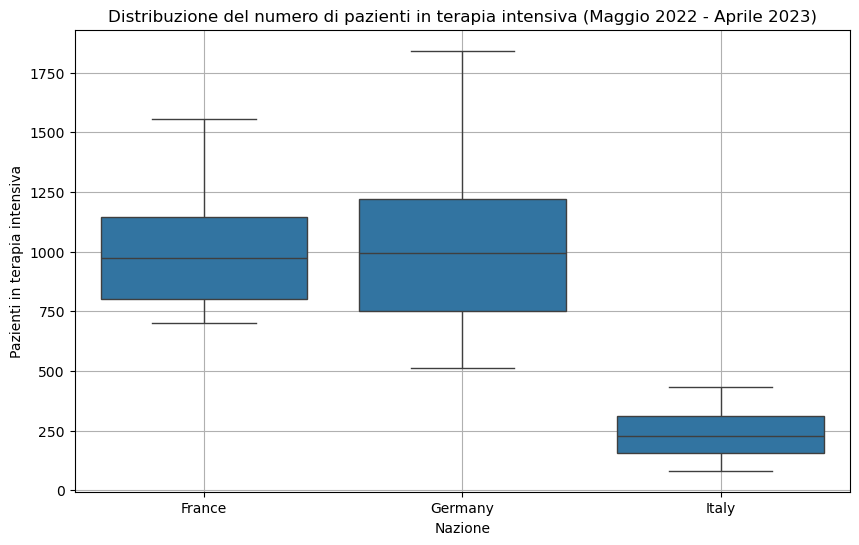

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtro i dati per Italia, Germania e Francia nel periodo richiesto al punto 4 della consegna
paesi = ['Italy', 'Germany', 'France']
df_icu = df[(df['location'].isin(paesi)) & (df['date'].between('2022-05-01', '2023-04-30'))]

# Creazione del boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=df_icu)
plt.title('Distribuzione del numero di pazienti in terapia intensiva (Maggio 2022 - Aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Pazienti in terapia intensiva')
plt.grid(True)
plt.show()

In [53]:
# Osservando il grafico, si può notare che Francia e Germania hanno avuto un numero significativamente più alto di pazienti in terapia intensiva rispetto all'Italia nel periodo considerato. 
# La mediana e l'intervallo interquartile (IQR) per Francia e Germania sono superiori a quelli dell'Italia, suggerendo una maggiore pressione sulle loro unità di terapia intensiva. 
# L'Italia, invece, ha registrato valori più bassi e una variabilità minore.

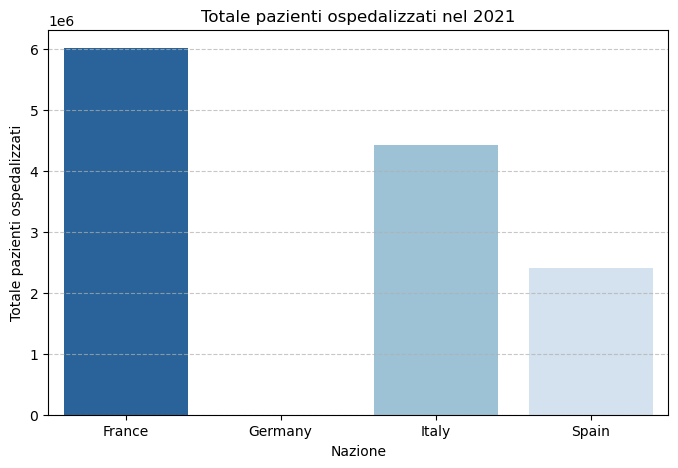

In [59]:
# Soluzione proposta relativamente la richiesta "a" del punto 5 della consegna

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mi assicuro che la colonna "date" sia in formato datetime
df['date'] = pd.to_datetime(df['date'])

# Applicazione di un filtro dei dati per le quattro nazioni e l'anno 2021
df_hosp = df[(df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & 
             (df['date'].dt.year == 2021)]

# Calcolo della somma dei pazienti ospedalizzati per nazione
hosp_totals = df_hosp.groupby('location')['hosp_patients'].sum()

# Generazione del grafico a barre
plt.figure(figsize=(8, 5))
sns.barplot(x=hosp_totals.index, y=hosp_totals.values, hue=hosp_totals.index, palette="Blues_r", legend=False)
plt.title("Totale pazienti ospedalizzati nel 2021")
plt.xlabel("Nazione")
plt.ylabel("Totale pazienti ospedalizzati")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [61]:
# Soluzione proposta relativamente la richiesta "b" del punto 5 della consegna

# Controllo la quantità di valori nulli nella colonna 'hosp_patients' per le nazioni selezionate
missing_values = df_hosp['hosp_patients'].isnull().sum()
total_rows = len(df_hosp)

# Stampo la percentuale di dati nulli
print(f"Valori nulli in 'hosp_patients': {missing_values} su {total_rows} righe ({(missing_values/total_rows)*100:.2f}%)")

Valori nulli in 'hosp_patients': 365 su 1460 righe (25.00%)


In [63]:
# Commento sui dati nulli:

# Se i dati mancanti sono pochi, possiamo considerarli trascurabili o sostituirli con metodi di interpolazione (media mobile o interpolazione lineare).

# Se sono molti, la gestione diventa problematica e potrebbe essere necessario rimuovere quelle date o trattarle con un'analisi più approfondita.